### semi supervised classificaition
negative positive

In [ ]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer-
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#processing data folder and cleaning the data with scikit learn inbuilt libraries

import glob
txt_files = glob.glob("/content/drive/MyDrive/review_polarity/txt_sentoken/neg/*.txt")

corpus = []
corpus2 =[]
booleans = []

for i in range(len(txt_files)):
  booleans.append(0)

  with open(txt_files[i], 'r') as file:
    data = file.read().replace('\n', '')
    review = re.sub('[^a-zA-Z]', ' ', data)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
    helper =  nltk.WordPunctTokenizer().tokenize(review)
    corpus2.append(helper)
   

In [ ]:
#processing data folder and cleaning the data with scikit learn inbuilt libraries

import glob
txt_files = glob.glob("/content/drive/MyDrive/review_polarity/txt_sentoken/pos/*.txt")
  


for i in range(len(txt_files)):
  booleans.append(1)
  with open(txt_files[i], 'r') as file:
    data = file.read().replace('\n', '')
    review = re.sub('[^a-zA-Z]', ' ', data)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
    helper =  nltk.WordPunctTokenizer().tokenize(review)
    corpus2.append(helper)
    # print(helper)
   
   

In [ ]:
# Take a look at first 10 examlples of the data
print(corpus[:10])

['happi bastard quick movi review damn k bug got head start movi star jami lee curti anoth baldwin brother william time stori regard crew tugboat come across desert russian tech ship strang kick power back littl know power within go gore bring action sequenc viru still feel empti like movi go flash substanc know crew realli middl nowher know origin took ship big pink flashi thing hit mir cours know donald sutherland stumbl around drunkenli throughout hey let chase peopl around robot act averag even like curti like get kick work halloween h sutherland wast baldwin well act like baldwin cours real star stan winston robot design schnazzi cgi occasion good gore shot like pick someon brain robot bodi part realli turn movi otherwis pretti much sunken ship movi', 'movi like make jade movi viewer thank invent timex indiglo watch base late televis show name mod squad tell tale three reform crimin employ polic go undercov howev thing go wrong evid get stolen immedi suspicion cours ad make seem l

In [ ]:
# Collecting postive seed words
positives = []

ps = PorterStemmer()

with open('/content/positive-words.txt', 'r') as file:
    data = file.readlines()

    for line in data:
        line = line.strip()
        line = line.lower()
        line = ps.stem(line)
        positives.append(line)


In [ ]:
# Collecting negative seed words

negatives =[]

ps = PorterStemmer()

with open('/content/negative-words.txt', 'r') as file:
    data = file.readlines()

    for line in data:
        line = line.strip()
        line = line.lower()
        line = ps.stem(line)
        negatives.append(line)

In [ ]:
# Length and seed words in negatives 

negatives = list(set(negatives))
print(len(negatives))
print(negatives)

3160
['deplor', 'imbroglio', 'scummi', 'rivalri', 'expel', 'unrespons', 'scandal', 'crude', 'rancor', 'brainless', 'predatori', 'buzz', 'stall', 'trap', 'bash', 'worsen', 'sugar-coat', 'bleakli', 'pretens', 'gruesom', 'weak', 'gnaw', 'bent', 'shimmi', 'wack', 'playth', 'leeri', 'pan', 'culpabl', 'stupifi', 'viper', 'depress', 'unsupport', 'demis', 'worthlessli', 'cheapen', 'damnabl', 'heckl', 'odd', 'sap', 'scream', 'bragger', 'infirm', 'intermitt', 'diffid', 'hyster', 'plea', 'smelli', 'asham', 'antagon', 'conspiraci', 'dirti', 'dumb', 'slap', 'disast', 'distress', 'repress', 'prejudici', 'forc', 'helplessli', 'protract', 'temptat', 'shortsight', 'thumb-down', 'unbeliev', 'denounc', 'monotoni', 'rival', 'slaughter', 'abus', 'gainsay', 'hideous', 'vicious', 'hassel', 'ruffian', 'injur', 'insol', 'gripe', 'emaci', 'wheedl', 'deviat', 'unmov', 'grouchi', 'somber', 'gibber', 'smudg', 'unaccept', 'inequit', 'retaliatori', 'filth', 'drop-out', 'batti', 'inund', 'heret', 'wearisom', 'gritti'

In [ ]:
# Length of positives
positives = list(set(positives))
print(len(positives))

1391


In [ ]:
# Function to classify data based on simple counting principle

result =[]

def positiveCount(review) :
    count = 0
    for i in review:
        if i in positives:
            count+=1

    return count


def negativeCount(review) :
    count = 0
    for i in review:
        if i  in negatives:
            count+=1

    return count


def classify(corpus):
    
    for review in corpus:
        pos = positiveCount(review)
        neg = negativeCount(review)

        if (pos >= neg) : 
            result.append([review , 1])
        else:
             result.append([review , 0])


classify(corpus)


In [ ]:
# Printing few results

for i in range(5):
    print(result[i][0] , result[i][1])



foundPos = 0 
foundNeg = 0

for i in result:
    if i[1]==0:
        foundNeg+=1
    else:
        foundPos+=1

happi bastard quick movi review damn k bug got head start movi star jami lee curti anoth baldwin brother william time stori regard crew tugboat come across desert russian tech ship strang kick power back littl know power within go gore bring action sequenc viru still feel empti like movi go flash substanc know crew realli middl nowher know origin took ship big pink flashi thing hit mir cours know donald sutherland stumbl around drunkenli throughout hey let chase peopl around robot act averag even like curti like get kick work halloween h sutherland wast baldwin well act like baldwin cours real star stan winston robot design schnazzi cgi occasion good gore shot like pick someon brain robot bodi part realli turn movi otherwis pretti much sunken ship movi 1
movi like make jade movi viewer thank invent timex indiglo watch base late televis show name mod squad tell tale three reform crimin employ polic go undercov howev thing go wrong evid get stolen immedi suspicion cours ad make seem like

### word 2 vec

In [ ]:
# train data 
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [ ]:
# remove stop words...Manual stop words are used.
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [ ]:
corpus = remove_stop_words(corpus) # Remove stop words

In [ ]:
#create dictionary of words
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [ ]:
# words in corpus
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [ ]:
# assgining identifiers to each word
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

# making bi-grams    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [ ]:
# Look at the context and targets in the train data
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [ ]:
word2int

{'boy': 11,
 'girl': 6,
 'king': 1,
 'man': 9,
 'pretty': 7,
 'prince': 8,
 'princess': 2,
 'queen': 3,
 'strong': 0,
 'wise': 5,
 'woman': 4,
 'young': 10}

In [ ]:

import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.compat.v1.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.compat.v1.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random.normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random.normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random.normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random.normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.math.log(prediction), axis=[1]))

# training operation
train_op = tf.compat.v1.train.GradientDescentOptimizer(0.05).minimize(loss)

In [ ]:
sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.6781056
iteration 3000 loss is :  1.7548199
iteration 6000 loss is :  1.7017074
iteration 9000 loss is :  1.6842297
iteration 12000 loss is :  1.6733873
iteration 15000 loss is :  1.6655614
iteration 18000 loss is :  1.6594455


In [ ]:

# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[ 3.250481   -2.081837  ]
 [ 0.7097317   0.67683065]
 [-5.7037716   2.4237206 ]
 [-0.79223824  0.27041543]
 [-1.3095644   0.70378757]
 [-3.6644301  -0.96131104]
 [-1.1975219   0.3575763 ]
 [-0.70021653 -3.2829273 ]
 [ 4.3701477   4.3339205 ]
 [ 3.235558    3.4493706 ]
 [ 0.10724215 -0.52537507]
 [ 0.78384495  0.6338611 ]]


In [ ]:
# word embeddings learnt
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,strong,3.250481,-2.081837
1,king,0.709732,0.676831
2,princess,-5.703772,2.423721
3,queen,-0.792238,0.270415
4,woman,-1.309564,0.703788
5,wise,-3.664430,-0.961311
6,girl,-1.197522,0.357576
7,pretty,-0.700217,-3.282927
8,prince,4.370148,4.333920
9,man,3.235558,3.449371


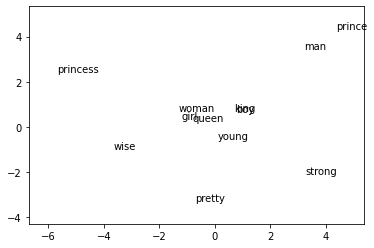

In [ ]:
# spatial look up of the words embeddings
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)


### Neural Network implementation

In [ ]:
#Basic imports
import numpy as np

In [ ]:
# set up seed value and initialize
# weights and bias of neural network

# 3 neurons 
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05 #learning rate

In [ ]:
# creating a dataset ( static dataset is used here )
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],
                      [0,1,0]])#Dependent variable
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])
labels = labels.reshape(7,1)

In [ ]:
# sigmoid and its derivative functions

def sigmoid(x):
    return 1/(1+np.exp(-x))


def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [ ]:

# training the ANN model 
# Backpropgation is also performed for every epoch
for epoch in range(25000):
    inputs = input_set
    XW = np.dot(inputs, weights)+ bias
    z = sigmoid(XW)
    error = z - labels
    print("squared loss - " ,error.sum()*error.sum())
    dcost = error
    dpred = sigmoid_derivative(z)
    z_del = dcost * dpred
    inputs = input_set.T
    weights = weights - lr*np.dot(inputs, z_del)
    
    for num in z_del:
        bias = bias - lr*num

Streaming output truncated to the last 5000 lines.
squared loss -  2.8304333086698855e-06
squared loss -  2.830326186863937e-06
squared loss -  2.830219070984221e-06
squared loss -  2.8301119610352437e-06
squared loss -  2.8300048570132003e-06
squared loss -  2.829897758918196e-06
squared loss -  2.8297906667494258e-06
squared loss -  2.8296835805082968e-06
squared loss -  2.8295765001932335e-06
squared loss -  2.829469425804341e-06
squared loss -  2.829362357341468e-06
squared loss -  2.8292552948015634e-06
squared loss -  2.8291482381876733e-06
squared loss -  2.829041187496612e-06
squared loss -  2.828934142731018e-06
squared loss -  2.8288271038858496e-06
squared loss -  2.8287200709651164e-06
squared loss -  2.8286130439649153e-06
squared loss -  2.828506022888228e-06
squared loss -  2.8283990077322725e-06
squared loss -  2.828291998498052e-06
squared loss -  2.8281849951852065e-06
squared loss -  2.8280779977915186e-06
squared loss -  2.827971006318512e-06
squared loss -  2.82786

In [ ]:
 #In the above training you can see that the loss is decreased.


# single point prediction 

single_pt = np.array([1,0,0])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)

[0.0113482]


### batch normalization

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.840, Test: 0.850


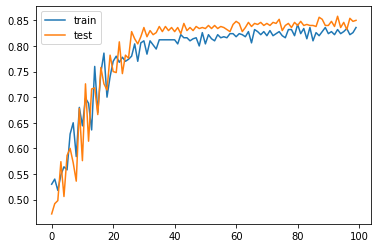

In [ ]:
# mlp for the two circles problem
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#MLP with batch normalization
# define model
from keras.layers import Dense
from keras.layers import BatchNormalization
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.836, Test: 0.850


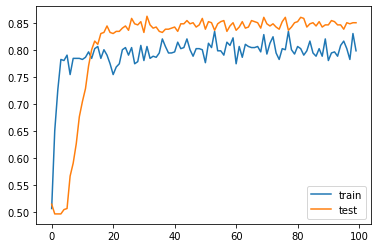

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# define model
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.812, Test: 0.822


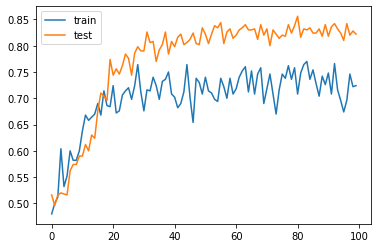

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

### two circles

In [ ]:
# required imports 


from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomUniform

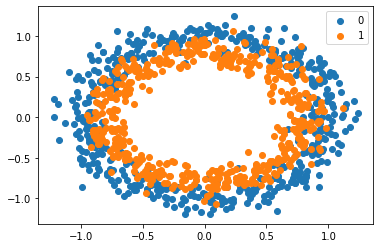

In [ ]:
# generate 1000 examples from 2 circles
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [ ]:
# generate 2d classification dataset
from sklearn.preprocessing import MinMaxScaler
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [ ]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
# defining a model with multi layer perceptron 
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

In [ ]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.804, Test: 0.838


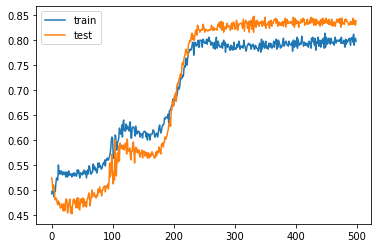

In [ ]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# define Deep MLP using hyperbolic tangent activation function
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

In [ ]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.838, Test: 0.834


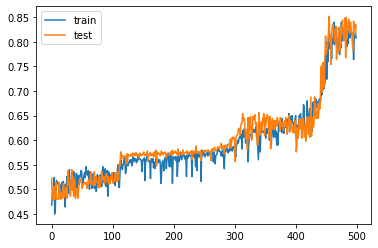

In [ ]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# define Deep MLP using ReLu Activation Function instead of tanh function
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.834, Test: 0.814


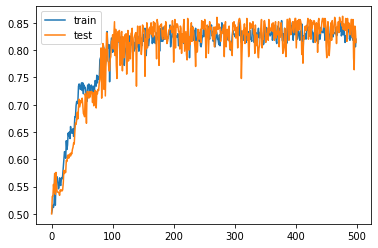

In [ ]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.802, Test: 0.810


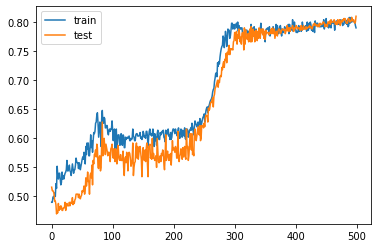

In [ ]:
# mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.600, Test: 0.576


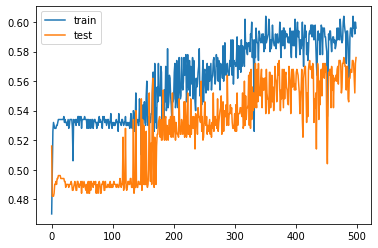

In [ ]:
# deeper mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.822, Test: 0.816


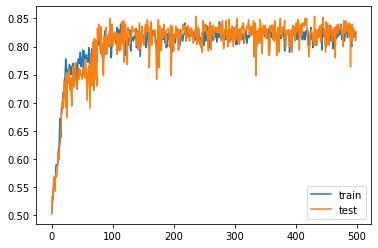

In [ ]:
# deeper mlp with relu for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

### HMM

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/data_python.csv')

V = data['Visible'].values

# Transition Probabilities
a = np.array(((0.54, 0.46), (0.49, 0.51)))

# Emission Probabilities
b = np.array(((0.16, 0.26, 0.58), (0.25, 0.28, 0.47)))

# Equal Probabilities for the initial distribution
initial_distribution = np.array((0.5, 0.5))


def forward(V, a, b, initial_distribution):
    alpha = np.zeros((V.shape[0], a.shape[0]))
    alpha[0, :] = initial_distribution * b[:, V[0]]

    for t in range(1, V.shape[0]):
        for j in range(a.shape[0]):
            # Matrix Computation Steps
            #                  ((1x2) . (1x2))      *     (1)
            #                        (1)            *     (1)
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]

    return alpha


alpha = forward(V, a, b, initial_distribution)
print(alpha)

[[8.00000000e-002 1.25000000e-001]
 [2.71570000e-002 2.81540000e-002]
 [1.65069392e-002 1.26198572e-002]
 [8.75653677e-003 6.59378003e-003]
 [4.61649960e-003 3.47369232e-003]
 [2.43311103e-003 1.83073126e-003]
 [1.28234420e-003 9.64864889e-004]
 [6.75844805e-004 5.08520930e-004]
 [3.56196241e-004 2.68010114e-004]
 [1.87729137e-004 1.41251652e-004]
 [9.89404851e-005 7.44450603e-005]
 [5.21454461e-005 3.92354139e-005]
 [2.74826583e-005 2.06785741e-005]
 [1.44844194e-005 1.08984050e-005]
 [7.63384683e-006 5.74387913e-006]
 [4.02333128e-006 3.02724551e-006]
 [9.50546790e-007 9.50495728e-007]
 [5.67842140e-007 4.33342042e-007]
 [3.01003967e-007 2.26639558e-007]
 [1.58685405e-007 1.19402560e-007]
 [8.36344763e-008 6.29285781e-008]
 [1.97593813e-008 1.97583215e-008]
 [5.29142730e-009 5.36649662e-009]
 [1.42660806e-009 1.44787155e-009]
 [2.36772066e-010 3.48663550e-010]
 [1.73247192e-010 1.34764774e-010]
 [4.14929379e-011 4.15586480e-011]
 [2.48065559e-011 1.89323811e-011]
 [3.62758511e-012 5.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('data_python.csv')

V = data['Visible'].values

# Transition Probabilities
a = np.array(((0.54, 0.46), (0.49, 0.51)))

# Emission Probabilities
b = np.array(((0.16, 0.26, 0.58), (0.25, 0.28, 0.47)))


def backward(V, a, b):
    beta = np.zeros((V.shape[0], a.shape[0]))

    # setting beta(T) = 1
    beta[V.shape[0] - 1] = np.ones((a.shape[0]))

    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(V.shape[0] - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, V[t + 1]]).dot(a[j, :])

    return beta


beta = backward(V, a, b)
print(beta)

[[5.30694627e-221 5.32373319e-221]
 [1.98173335e-220 1.96008747e-220]
 [3.76013005e-220 3.71905927e-220]
 [7.13445025e-220 7.05652279e-220]
 [1.35368670e-219 1.33890079e-219]
 [2.56847777e-219 2.54042305e-219]
 [4.87341571e-219 4.82018485e-219]
 [9.24679240e-219 9.14579247e-219]
 [1.75448135e-218 1.73531768e-218]
 [3.32894335e-218 3.29258230e-218]
 [6.31631895e-218 6.24732772e-218]
 [1.19845487e-217 1.18536461e-217]
 [2.27394020e-217 2.24910640e-217]
 [4.31450207e-217 4.26752151e-217]
 [8.18400558e-217 8.10023833e-217]
 [1.54390764e-216 1.54879133e-216]
 [5.76529885e-216 5.70232672e-216]
 [1.09390388e-215 1.08195740e-215]
 [2.07553704e-215 2.05294024e-215]
 [3.93694408e-215 3.89679070e-215]
 [7.42475030e-215 7.45380337e-215]
 [2.75287004e-214 2.76375836e-214]
 [1.02026824e-213 1.02516570e-213]
 [3.75081388e-213 3.83271718e-213]
 [1.87331474e-212 1.85414778e-212]
 [3.53388068e-212 3.54534373e-212]
 [1.31862333e-211 1.30631484e-211]
 [2.46872663e-211 2.52274817e-211]
 [1.23233029e-210 1.

### Gradient Descent

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
 

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)


In [ ]:
from math import exp
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs


In [ ]:

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])



In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('&gt;epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [ ]:
# Link to dataset download: https://archive.ics.uci.edu/ml/datasets/seeds

import pandas
data = pandas.read_csv('/content/seeds_dataset.csv' , sep='\t', header=None  )

data.head()
training_data = data.iloc[:25,:].values
training_data = training_data.tolist()

for row in training_data:
    row[-1] = int(row[-1]-1)

In [ ]:
n_inputs = len(training_data[0])-1
n_outputs = len(set([row[-1] for row in training_data]))  

print(n_inputs , n_outputs)

network = initialize_network(n_inputs, 4, n_outputs)
train_network(network, training_data, 0.5, 20, n_outputs)
for layer in network:
	print(layer)

7 1
&gt;epoch=0, lrate=0.500, error=0.073
&gt;epoch=1, lrate=0.500, error=0.055
&gt;epoch=2, lrate=0.500, error=0.044
&gt;epoch=3, lrate=0.500, error=0.036
&gt;epoch=4, lrate=0.500, error=0.031
&gt;epoch=5, lrate=0.500, error=0.027
&gt;epoch=6, lrate=0.500, error=0.024
&gt;epoch=7, lrate=0.500, error=0.022
&gt;epoch=8, lrate=0.500, error=0.020
&gt;epoch=9, lrate=0.500, error=0.018
&gt;epoch=10, lrate=0.500, error=0.017
&gt;epoch=11, lrate=0.500, error=0.015
&gt;epoch=12, lrate=0.500, error=0.014
&gt;epoch=13, lrate=0.500, error=0.013
&gt;epoch=14, lrate=0.500, error=0.013
&gt;epoch=15, lrate=0.500, error=0.012
&gt;epoch=16, lrate=0.500, error=0.011
&gt;epoch=17, lrate=0.500, error=0.011
&gt;epoch=18, lrate=0.500, error=0.010
&gt;epoch=19, lrate=0.500, error=0.010
[{'weights': [0.96238326621357, 0.33492537533758676, 0.9640157641061762, 0.7232340153663994, 0.219769238871942, 0.9325466799396094, 0.009351998672331635, 0.981654819017376], 'output': 0.9999999999991738, 'delta': 1.01884344609

### BPTT

In [ ]:
import numpy as np

In [ ]:
def softmax(vector):
	e = np.exp(vector)
	return e / e.sum()

In [ ]:
def rnn_cell_forward(xt, a_prev, parameters):
   
    # Retrieve parameters from "parameters"
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    
    a_next = np.tanh(np.dot(Waa, a_prev) + np.dot(Wax, xt) + ba)
    
    yt_pred = softmax(np.dot(Wya, a_next) + by)
    
    
   
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

In [ ]:
## unit testing 
np.random.seed(1)
xt = np.random.randn(3,10)
a_prev = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a_next, yt_pred, cache = rnn_cell_forward(xt, a_prev, parameters)
print("a_next[4] = ", a_next[4])
print("a_next.shape = ", a_next.shape)
print("yt_pred[1] =", yt_pred[1])
print("yt_pred.shape = ", yt_pred.shape)

a_next[4] =  [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape =  (5, 10)
yt_pred[1] = [0.17867403 0.00059564 0.00192797 0.00231747 0.0396566  0.00828257
 0.00990921 0.21155864 0.43903066 0.00713304]
yt_pred.shape =  (2, 10)


In [ ]:
def rnn_forward(x, a0, parameters):

    
    
    caches = []
    
   
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
   
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))
    
    
    a_next = a0
    
    # loop over all time-steps
    for t in range(T_x):
        
        a_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], a_next, parameters)
        a[:,:,t] = a_next
        y_pred[:,:,t] = yt_pred
        caches.append(cache)
        
    
    
    # store values needed for backward propagation in cache
    caches = (caches, x)
    
    return a, y_pred, caches

In [ ]:
#unit testing 
np.random.seed(1)
x = np.random.randn(3,10,4)
a0 = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a, y_pred, caches = rnn_forward(x, a0, parameters)
print("a[4][1] = ", a[4][1])
print("a.shape = ", a.shape)
print("y_pred[1][3] =", y_pred[1][3])
print("y_pred.shape = ", y_pred.shape)
print("caches[1][1][3] =", caches[1][1][3])
print("len(caches) = ", len(caches))

a[4][1] =  [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape =  (5, 10, 4)
y_pred[1][3] = [0.01644489 0.0328586  0.0014877  0.02851197]
y_pred.shape =  (2, 10, 4)
caches[1][1][3] = [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) =  2


#### BPTT

#### cell backpropagation


In [ ]:
def rnn_cell_backward(da_next, cache):
 
    
    # Retrieve values from cache
    (a_next, a_prev, xt, parameters) = cache
    
    # Retrieve values from parameters
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]

    
    dtanh = (1- a_next**2) * da_next

    # compute the gradient of the loss with respect to Wax 
    dxt = np.dot(Wax.T, dtanh)
    dWax = np.dot(dtanh, xt.T)

   
    da_prev = np.dot(Waa.T, dtanh)
    dWaa = np.dot(dtanh, a_prev.T)

    
    dba = np.sum(dtanh, 1, keepdims=True)

    
    
    # Store the gradients in a python dictionary
    gradients = {"dxt": dxt, "da_prev": da_prev, "dWax": dWax, "dWaa": dWaa, "dba": dba}
    
    return gradients

In [ ]:

def rnn_backward(da, caches):
 
        
    
    (caches, x) = caches
    (a1, a0, x1, parameters) = caches[0]
    
    # Retrieve dimensions from da's and x1's shapes
    n_a, m, T_x = da.shape
    n_x, m = x1.shape
    
    # initialize the gradients with the right sizes
    dx = np.zeros((n_x, m, T_x))
    dWax = np.zeros((n_a, n_x))
    dWaa = np.zeros((n_a, n_a))
    dba = np.zeros((n_a, 1))
    da0 = np.zeros((n_a, m))
    da_prevt = np.zeros((n_a, m))
    
    # Loop through all the time steps
    for t in reversed(range(T_x)):
        # Compute gradients at time step t. Choose wisely the "da_next" and the "cache" to use in the backward propagation step.
        gradients = rnn_cell_backward(da[:,:, t] + da_prevt, caches[t])
        # Retrieve derivatives from gradients
        dxt, da_prevt, dWaxt, dWaat, dbat = gradients["dxt"], gradients["da_prev"], gradients["dWax"], gradients["dWaa"], gradients["dba"]
        # Increment global derivatives w.r.t parameters by adding their derivative at time-step t
        dx[:, :, t] = dxt
        dWax += dWaxt
        dWaa += dWaat
        dba += dbat
        
    # Set da0 to the gradient of a which has been backpropagated through all time-steps
    da0 = da_prevt

    # Store the gradients in a python dictionary
    gradients = {"dx": dx, "da0": da0, "dWax": dWax, "dWaa": dWaa,"dba": dba}
    
    return gradients

In [ ]:
np.random.seed(1)
x = np.random.randn(3,10,4)
a0 = np.random.randn(5,10)
Wax = np.random.randn(5,3)
Waa = np.random.randn(5,5)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Wax": Wax, "Waa": Waa, "Wya": Wya, "ba": ba, "by": by}
a, y, caches = rnn_forward(x, a0, parameters)
da = np.random.randn(5, 10, 4)
gradients = rnn_backward(da, caches)

print("gradients found using BPTT :")


print("gradients[\"dx\"][1][2] =", gradients["dx"][1][2])
print("gradients[\"dx\"].shape =", gradients["dx"].shape)
print("gradients[\"da0\"][2][3] =", gradients["da0"][2][3])
print("gradients[\"da0\"].shape =", gradients["da0"].shape)
print("gradients[\"dWax\"][3][1] =", gradients["dWax"][3][1])
print("gradients[\"dWax\"].shape =", gradients["dWax"].shape)
print("gradients[\"dWaa\"][1][2] =", gradients["dWaa"][1][2])
print("gradients[\"dWaa\"].shape =", gradients["dWaa"].shape)
print("gradients[\"dba\"][4] =", gradients["dba"][4])
print("gradients[\"dba\"].shape =", gradients["dba"].shape)

gradients found using BPTT :
gradients["dx"][1][2] = [-2.07101689 -0.59255627  0.02466855  0.01483317]
gradients["dx"].shape = (3, 10, 4)
gradients["da0"][2][3] = -0.31494237512664996
gradients["da0"].shape = (5, 10)
gradients["dWax"][3][1] = 11.264104496527777
gradients["dWax"].shape = (5, 3)
gradients["dWaa"][1][2] = 2.303333126579893
gradients["dWaa"].shape = (5, 5)
gradients["dba"][4] = [-0.74747722]
gradients["dba"].shape = (5, 1)


### Language identification using sequence labelling

In [ ]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import tensorflow as tf



In [ ]:

path_eng = '/content/eng.txt'
text_eng = open(path_eng).read().lower()
train_eng =  text_eng[:int(.8*len(text_eng))]
test_eng =  text_eng[int(.8*len(text_eng)):]


path_frn = '/content/frn.txt'
text_frn = open(path_frn).read().lower()
train_frn =  text_frn[:int(.8*len(text_frn))]
test_frn =  text_frn[int(.8*len(text_frn)):]


chars = sorted(list(set(text_frn+text_eng)))
chars += ['_']
print('total chars:', len(chars))
print (chars)
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

sentences_eng = []
next_chars_eng = []

sentences_frn = []
next_chars_frn = []

def generate_sub_string_eng(maxlen,text,sentences, next_chars):
    for i in range(0, len(text) - maxlen):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])
        
def generate_sub_string_frn(maxlen,text,sentences, next_chars):
    for i in range(0, len(text) - maxlen):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])
        
maxlen = 14

for i in range(1,maxlen):
    generate_sub_string_eng(i,text_eng,sentences_eng, next_chars_eng)
    
print (len(sentences_eng))
sentences_eng = ['_'+x+'_' for x in sentences_eng]


for i in range(1,maxlen):
    generate_sub_string_frn(i,text_frn,sentences_frn, next_chars_frn)
    
print (len(sentences_frn))
sentences_frn = ['_'+x+'_' for x in sentences_frn]

print (sentences_eng[-50:])
print (sentences_frn[-50:])


total chars: 45
['\n', '\x0c', ' ', "'", ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '_']
139581
156000
['_estruction of_', '_struction of _', '_truction of a_', '_ruction of an_', '_uction of any_', '_ction of any _', '_tion of any o_', '_ion of any of_', '_on of any of _', '_n of any of t_', '_ of any of th_', '_of any of the_', '_f any of the _', '_ any of the r_', '_any of the ri_', '_ny of the rig_', '_y of the righ_', '_ of the right_', '_of the rights_', '_f the rights _', '_ the rights a_', '_the rights an_', '_he rights and_', '_e rights and _', '_ rights and f_', '_rights and fr_', '_ights and fre_', '_ghts and free_', '_hts and freed_', '_ts and freedo_', '_s and freedom_', '_ and freedoms_', '_and freedoms _', '_nd freedoms s_', '_d freedoms se_', '_ freedoms set_', '_freedoms set _', '_reedoms set f_', '_eedoms set fo_'

In [ ]:
print('Vectorization...')
maxlen = 16
X_eng = np.zeros((len(sentences_eng), maxlen, len(chars)), dtype=np.bool)
y_eng = np.zeros((len(sentences_eng), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_eng):
    for t, char in enumerate(sentence):
        X_eng[i, t, char_indices[char]] = 1
        y_eng[i, char_indices[next_chars_eng[i]]] = 1        
        
        
X_frn = np.zeros((len(sentences_frn), maxlen, len(chars)), dtype=np.bool)
y_frn = np.zeros((len(sentences_frn), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_frn):
    for t, char in enumerate(sentence):
        X_frn[i, t, char_indices[char]] = 1
        y_frn[i, char_indices[next_chars_frn[i]]] = 1

Vectorization...


In [ ]:
print('Build eng model...')
model_eng = Sequential()
model_eng.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_eng.add(Dense(len(chars)))
model_eng.add(Activation('softmax'))

optimizer = tf.keras.optimizers.RMSprop(lr=0.01)
model_eng.compile(loss='categorical_crossentropy', optimizer=optimizer)

print('Build frn model...')
model_frn = Sequential()
model_frn.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_frn.add(Dense(len(chars)))
model_frn.add(Activation('softmax'))

optimizer = tf.keras.optimizers.RMSprop(lr=0.01)
model_frn.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build eng model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Build frn model...


In [ ]:
model_eng.fit(X_eng, y_eng,
          batch_size=128,
          epochs=10)

Epoch 1/10
1091/1091 [==============================] - 53s 49ms/step - loss: 0.7706
Epoch 2/10
1091/1091 [==============================] - 53s 48ms/step - loss: 0.7404
Epoch 3/10
1091/1091 [==============================] - 53s 49ms/step - loss: 0.7203
Epoch 4/10
1091/1091 [==============================] - 53s 49ms/step - loss: 0.7023
Epoch 5/10
1091/1091 [==============================] - 53s 48ms/step - loss: 0.6885
Epoch 6/10
1091/1091 [==============================] - 53s 49ms/step - loss: 0.6800
Epoch 7/10
1091/1091 [==============================] - 53s 49ms/step - loss: 0.6696
Epoch 8/10
1091/1091 [==============================] - 54s 50ms/step - loss: 0.6630
Epoch 9/10
1091/1091 [==============================] - 55s 51ms/step - loss: 0.6567
Epoch 10/10
1091/1091 [==============================] - 55s 50ms/step - loss: 0.6495


In [ ]:
model_frn.fit(X_frn, y_frn,
          batch_size=128,
          epochs=10)

Epoch 1/10
1219/1219 [==============================] - 60s 48ms/step - loss: 2.1179
Epoch 2/10
1219/1219 [==============================] - 58s 48ms/step - loss: 1.2423
Epoch 3/10
1219/1219 [==============================] - 58s 48ms/step - loss: 1.0228
Epoch 4/10
1219/1219 [==============================] - 59s 48ms/step - loss: 0.9177
Epoch 5/10
1219/1219 [==============================] - 59s 49ms/step - loss: 0.8545
Epoch 6/10
1219/1219 [==============================] - 59s 48ms/step - loss: 0.8109
Epoch 7/10
1219/1219 [==============================] - 58s 48ms/step - loss: 0.7818
Epoch 8/10
1219/1219 [==============================] - 59s 48ms/step - loss: 0.7617
Epoch 9/10
1219/1219 [==============================] - 59s 48ms/step - loss: 0.7441
Epoch 10/10
1219/1219 [==============================] - 59s 49ms/step - loss: 0.7294


In [ ]:
test_string_eng = []
test_string_frn = []


for i in range(100):
    start_index = random.randint(0, len(test_eng) - 5 - 1)
    generated = ''
    sentence = test_eng[start_index: start_index + 5]
    generated += sentence
    test_string_eng.append(generated)
    
for i in range(100):
    start_index = random.randint(0, len(test_frn) - 5 - 1)
    generated = ''
    sentence = test_frn[start_index: start_index + 5]
    generated += sentence
    test_string_frn.append(generated)
    
test_string_eng = ['_'+x+'_' for x in test_string_eng]
test_string_frn = ['_'+x+'_' for x in test_string_frn]

print (test_string_eng[-5:], test_string_frn[-5:])

ngram_e = []
ngram_f = []
next_chars_e = []
next_chars_f = []

prediction = []

for i in range(len(test_string_eng)):
    prediction_product_eng = 1
    prediction_product_frn = 1
    for j in range(1,6):
        current_string = test_string_eng[i][:j]
        next_char_index = char_indices[test_string_eng[i][j]]
        current_string_vec = np.zeros((1, maxlen, len(chars)), dtype=np.bool)
        for t, char in enumerate(current_string):
            current_string_vec[0, t, char_indices[char]] = 1
            eng_pred = model_eng.predict(current_string_vec)[0]
            frn_pred = model_frn.predict(current_string_vec)[0]
            prediction_product_eng *= eng_pred[next_char_index]
            prediction_product_frn *= frn_pred[next_char_index]
    prediction.append((np.e ** np.log(prediction_product_eng),np.e ** np.log(prediction_product_frn)))
    
for i in range(len(test_string_frn)):
    prediction_product_eng = 1
    prediction_product_frn = 1
    for j in range(1,6):
        current_string = test_string_frn[i][:j]
        next_char_index = char_indices[test_string_frn[i][j]]
        current_string_vec = np.zeros((1, maxlen, len(chars)), dtype=np.bool)
        for t, char in enumerate(current_string):
#             print (t,char)
            current_string_vec[0, t, char_indices[char]] = 1
            eng_pred = model_eng.predict(current_string_vec)[0]
            frn_pred = model_frn.predict(current_string_vec)[0]
#             print (eng_pred)
            prediction_product_eng *= eng_pred[next_char_index]
            prediction_product_frn *= frn_pred[next_char_index]
    prediction.append((np.e ** np.log(prediction_product_eng),np.e ** np.log(prediction_product_frn)))
        
pred_sum_e = [1 if x[0]>x[1] else 0 for x in prediction[:100] ]
pred_sum_f = [1  if x[0]<x[1] else 0 for x in prediction[100:]]

print (sum(pred_sum_e))
print (sum(pred_sum_f))


['_funda_', '_lemen_', '_socia_', '_ shal_', '_e art_'] ['_tion _', '_iale._', '_est p_', '_gence_', '_doit _']
73
78


In [ ]:
pred_sum_e = [1 if x[0]>x[1] else 0 for x in prediction[:100] ]
pred_sum_f = [0  if x[0]<x[1] else 1 for x in prediction[100:]]
y_e = [1]*100 + [0]*100
scores_e = pred_sum_e + pred_sum_f

from sklearn.metrics import roc_curve, auc
fpr_e, tpr_e, thresholds_e = roc_curve(y_e, scores_e)
roc_auc_e = auc(fpr_e, tpr_e)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr_e, tpr_e, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_e)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### name entity recognition 

##### Required files to run the colab
######1) CONLL2003 dataset <a name="tag">https://www.kaggle.com/alaakhaled/conll003-englishversion</a> 
######2) glove.6B.100d.txt  <a name="">https://www.kaggle.com/danielwillgeorge/glove6b100dtxt/version/1</a>

##### Glove Embeddings

In [ ]:
import os
import math
import pickle
import logging
import argparse
import itertools
import numpy as np
import tensorflow as tf 
from keras.preprocessing.sequence import pad_sequences
from fastprogress.fastprogress import master_bar, progress_bar


In [ ]:
def split_text_label(filename , sentence):
  f = open(filename)
  split_labeled_text = []
  sentence = []

  for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
       if len(sentence) > 0:
         split_labeled_text.append(sentence)
         sentence = []
       continue
    splits = line.split(' ')
    sentence.append([splits[0],splits[-1].rstrip("\n")])

  if len(sentence) > 0:
    split_labeled_text.append(sentence)
    sentence = []
  return split_labeled_text
split_train = split_text_label("/content/CONLL2003" , sentence)

In [ ]:
input_data = []

for i in split_train:
    helper = []
    for j in i:
        helper.append(j[0])
    input_data.append(helper)



[['EU', 'B-ORG'], ['rejects', 'O'], ['German', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['British', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]
['The', 'continued', 'strong', 'tone', 'to', 'cash', 'cattle', 'and', 'beef', 'markets', 'should', 'prompt', 'further', 'support', '.']


In [ ]:
labelSet = set()
wordSet = set()
# words and labels
for data in [split_train]:
  for labeled_text in data:
    for word, label in labeled_text:
      labelSet.add(label)
      wordSet.add(word.lower())

In [ ]:
sorted_labels = sorted(list(labelSet), key=len)
# Create mapping for labels
label2Idx = {}
for label in sorted_labels:
  label2Idx[label] = len(label2Idx)
idx2Label = {v: k for k, v in label2Idx.items()}
# Create mapping for words
word2Idx = {}
if len(word2Idx) == 0:
  word2Idx["PADDING_TOKEN"] = len(word2Idx)
  word2Idx["UNKNOWN_TOKEN"] = len(word2Idx)
for word in wordSet:
  word2Idx[word] = len(word2Idx)

In [ ]:
num_labels = len(label2Idx)

In [ ]:

def createMatrices(data, word2Idx, label2Idx):
  sentences = []
  labels = []
  for split_labeled_text in data:
     wordIndices = []
     labelIndices = []
     for word, label in split_labeled_text:
       if word in word2Idx:
          wordIdx = word2Idx[word]
       elif word.lower() in word2Idx:
          wordIdx = word2Idx[word.lower()]
       else:
          wordIdx = word2Idx['UNKNOWN_TOKEN']
       wordIndices.append(wordIdx)
       labelIndices.append(label2Idx[label])
     sentences.append(wordIndices)
     labels.append(labelIndices)
  return sentences, labels
train_sentences, train_labels = createMatrices(split_train, word2Idx, label2Idx)

In [ ]:
def padding(sentences, labels, max_len, padding='post'):
  padded_sentences = pad_sequences(sentences, max_len,       
  padding='post')
  padded_labels = pad_sequences(labels, max_len, padding='post')
  return padded_sentences, padded_labels
train_features, train_labels = padding(train_sentences, train_labels, max_seq_len, padding='post' )

In [ ]:
max_seq_len = 128
EMBEDDING_DIM = 100
epochs = 10

In [ ]:
embeddings_index = {}

f = open('/content/glove.6B.100d.txt', encoding="utf-8")


for line in f:
  values = line.strip().split(' ')
#   print(values)
  
#   coef = np.asarray(values[1:] , dtype='float32')
#   print(coef)
#   break


  word = values[0] # the first entry is the word
  try:
  
    coefs = np.asarray(values[1:], 'float32') #100d vectors  

  except ValueError:
       print(word)
       print(values[1:])
   
  else: continue

  embeddings_index[word] = coefs

f.close()


embedding_matrix = np.zeros((len(word2Idx), EMBEDDING_DIM))
# Word embeddings for the tokens
for word,i in word2Idx.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

tchite
['0.4654', '-0.39168', '-0.023594', '0.037557', '0.47963', '-0.18754', '0.30713', '0.12692', '0.50472', '0.19968', '0.253', '0.22837', '-0.21138', '-0.23348', '0.065213', '0.42486', '0.25058', '0.11039', '0.064214', '0.21729', '-0.32655', '0.39974', '0.13945', '-0.65629', '-0.12957', '0.1065', '-0.24862', '0.61694', '-0.19889', '0.37831', '0.27268', '0.20573', '-0.38906', '-0.010677', '0.26321', '0.17483', '-0.36343', '0.24636', '-0.7767', '0.44811', '0.42271', '0.12024', '-0.11424', '0.34734', '-0.16554', '0.31655', '-0.052983', '0.27776', '0.72709', '-0.040275', '0.0033431', '0.25061', '-0.25106', '0.056889', '0.02998', '0.78813', '-0.16279', '0.01737', '-0.47279', '-0.23758', '0.34189', '0.015603', '0.71382', '-0.03464', '-0.1068', '0.42032', '-0.90541', '-0.077999', '0.018398', '0.13529', '-0.08648', '-0.17822', '0.65628', '-0.30038', '0.1997', '-0.20194', '-0.19031', '-1.4431', '0.13452', '0.12866', '-0.34021', '-0.080442', '-0.17621', '-0.021697', '0.76349', '-0.13856', '-

In [ ]:
train_batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

shuffled_train_dataset = train_dataset.shuffle(buffer_size=train_features.shape[0], reshuffle_each_iteration=True)
batched_train_dataset = shuffled_train_dataset.batch(train_batch_size, drop_remainder=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
class TFNer(tf.keras.Model):
    def __init__(self, max_seq_len, embed_input_dim, embed_output_dim, num_labels, weights):
        super(TFNer, self).__init__() 
        self.embedding = layers.Embedding(input_dim=embed_input_dim, 
        output_dim=embed_output_dim, weights=weights,    
        input_length=max_seq_len, trainable=False, mask_zero=True)        
        
        self.bilstm = layers.Bidirectional(layers.LSTM(128,  
        return_sequences=True))
        self.dense = layers.Dense(num_labels)
    def call(self, inputs):
        x = self.embedding(inputs) # batchsize, max_seq_len,      
        x = self.bilstm(x) #batchsize, max_seq_len, hidden_dim_bilstm
        logits = self.dense(x) #batchsize, max_seq_len, num_labels
        return logits

In [ ]:
model = TFNer(max_seq_len=max_seq_len,embed_input_dim=len(word2Idx), embed_output_dim=EMBEDDING_DIM, weights=[embedding_matrix], num_labels=num_labels)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
epoch_bar = master_bar(range(epochs))
train_pb_max_len = math.ceil(float(len(train_features))/float(train_batch_size))

In [ ]:
train_loss_metric = tf.keras.metrics.Mean('training_loss', dtype=tf.float32)


def train_step_fn(sentences_batch, labels_batch):
  with tf.GradientTape() as tape:
    logits = model(sentences_batch)
    loss = scce(labels_batch, logits)
  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(list(zip(grads,   
  model.trainable_variables)))
  return loss, logits


for epoch in epoch_bar:
  for sentences_batch, labels_batch in progress_bar(batched_train_dataset, total=train_pb_max_len,parent=epoch_bar) :
    loss, logits = train_step_fn(sentences_batch, labels_batch)
    train_loss_metric(loss)
  train_loss_metric.reset_states()
  


In [ ]:
print(loss)

tf.Tensor(0.051382564, shape=(), dtype=float32)


#### Word2vec Embeddings

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model_1 = Word2Vec(input_data, size=100, min_count=1

Word2Vec(vocab=23623, size=100, alpha=0.025)


100

In [ ]:

embedding_matrix_1= np.zeros((len(word2Idx), EMBEDDING_DIM))
# Word embeddings for the tokens
for word,i in word2Idx.items():
  embedding_vector_1 =0
  try:
     embedding_vector_1 = model_1.wv[word]

  except KeyError:
      print(word)
      
  else: 
      continue

  if embedding_vector_1 is not None:
    embedding_matrix_1[i] = embedding_vector_1

print(len(embedding_matrix_1))

In [ ]:
model_1 = TFNer(max_seq_len=max_seq_len,embed_input_dim=len(word2Idx), embed_output_dim=EMBEDDING_DIM, weights=[embedding_matrix_1], num_labels=num_labels)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
epoch_bar = master_bar(range(epochs))
train_pb_max_len = math.ceil(float(len(train_features))/float(train_batch_size))

In [ ]:
train_loss_metric = tf.keras.metrics.Mean('training_loss', dtype=tf.float32)


def train_step_fn(sentences_batch, labels_batch):
  with tf.GradientTape() as tape:
    logits = model_1(sentences_batch)
    loss = scce(labels_batch, logits)
  grads = tape.gradient(loss, model_1.trainable_variables)
  optimizer.apply_gradients(list(zip(grads,   
  model_1.trainable_variables)))
  return loss, logits


for epoch in epoch_bar:
  for sentences_batch, labels_batch in progress_bar(batched_train_dataset, total=train_pb_max_len,parent=epoch_bar) :
    loss, logits = train_step_fn(sentences_batch, labels_batch)
    train_loss_metric(loss)
  train_loss_metric.reset_states()
  


In [ ]:
print(loss)

tf.Tensor(0.09584866, shape=(), dtype=float32)


#### Observations

#### NER with Glove embeddings ( loss = 0.051382564 )  performed better than word2vec  embeddings ( loss = 0.09584866 ) [ comparision is based on the loss calculated ]

## Image classification

### RNNs

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()


model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


# train the network
model.fit(x_train, y_train, epochs=5, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


### LSTMs

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(LSTM(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=5, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               291840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 97s 203ms/step - loss: 2.2491 - accuracy: 0.2571
Epoch 2/5
469/469 [==============================] - 98s 209ms/step - loss: 1.9514 - accuracy: 0.3450
Epoch 3/5
469/469 [==============================] - 96s 204ms/step - loss: 1.5741 - accuracy: 0.4817
Epoch 4/5
469/469 [==============================] - 97s 206ms/step - lo

### Observations-

#####1) LSTMS needs more no of epochs to get the same accuracy as that of RNNs 
#####2) Both have performed well on the image classification task.
#####3) In this task RNNs can be prefered to LSTMs